Used cifar-10 dataset to perform the following tasks:

• Visualize 5 samples from each class in the form of images.

• Apply LDA(use sklearn) on the given dataset.

• Report accuracy and class-wise accuracy for testing dataset.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch_metadata = unpickle("/content/drive/MyDrive/batches.meta")
batch_1=unpickle('/content/drive/MyDrive/data_batch_1')
batch_2=unpickle('/content/drive/MyDrive/data_batch_2')
batch_3=unpickle('/content/drive/MyDrive/data_batch_3')
batch_4=unpickle('/content/drive/MyDrive/data_batch_4')
batch_5=unpickle('/content/drive/MyDrive/data_batch_5')
test_batch=unpickle('/content/drive/MyDrive/test_batch')

train_x = []
train_x.extend(batch_1[b'data'])
train_x.extend(batch_2[b'data'])
train_x.extend(batch_3[b'data'])
train_x.extend(batch_4[b'data'])
train_x.extend(batch_5[b'data'])
train_x = np.array(train_x)
train_x1 = train_x.reshape(train_x.shape[0],3,32,32)
train_y = []
train_y.extend(batch_1[b'labels'])
train_y.extend(batch_2[b'labels'])
train_y.extend(batch_3[b'labels'])
train_y.extend(batch_4[b'labels'])
train_y.extend(batch_5[b'labels'])
train_y = np.array(train_y)

test_x = test_batch[b'data']
test_y = test_batch[b"labels"]
test_x1 = test_x.reshape(test_x.shape[0],3,32,32)

labels2id = {index : str(label,'utf-8') for index,label in enumerate(batch_metadata[b'label_names'])}

airplane


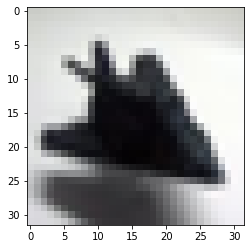

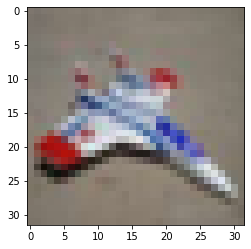

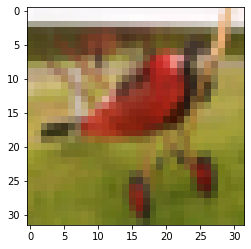

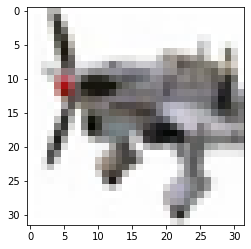

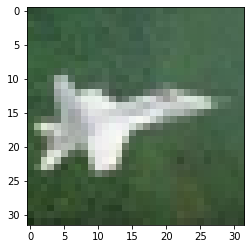

automobile


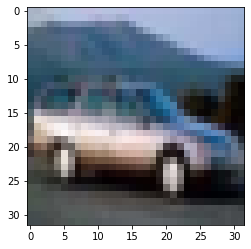

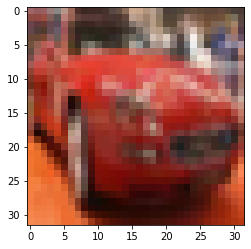

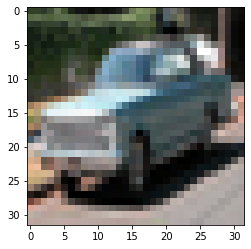

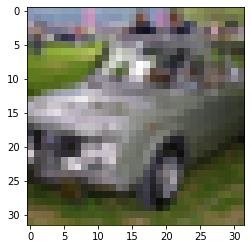

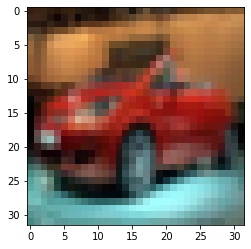

bird


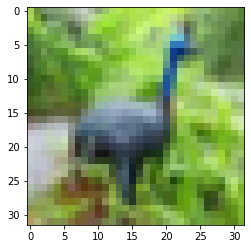

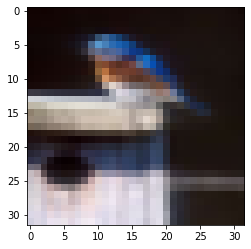

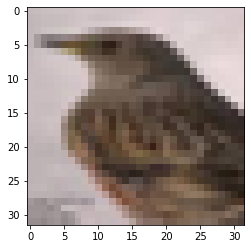

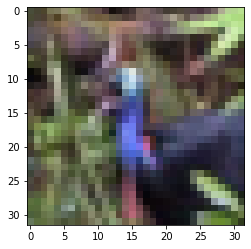

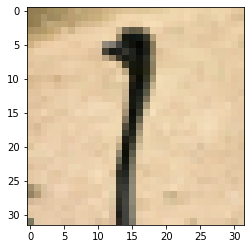

cat


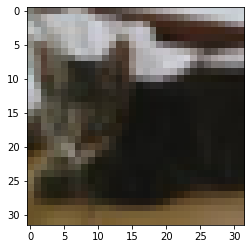

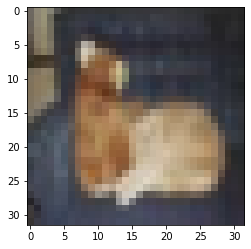

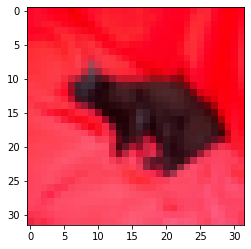

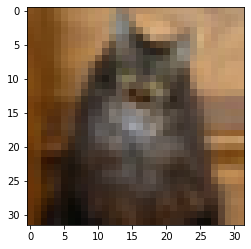

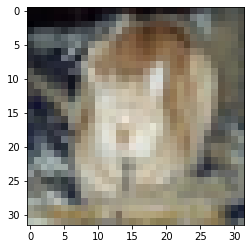

deer


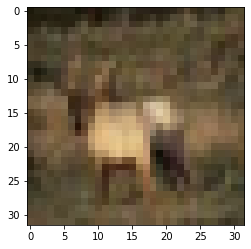

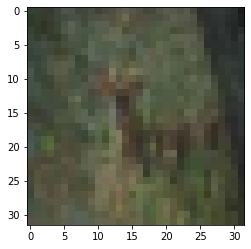

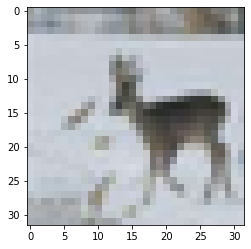

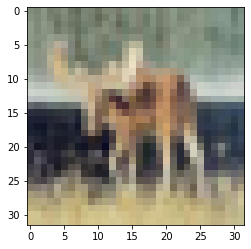

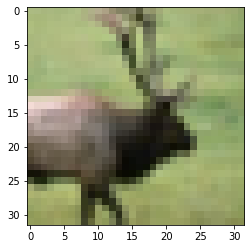

dog


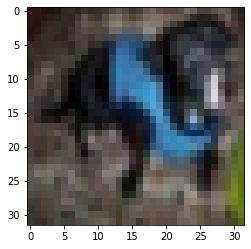

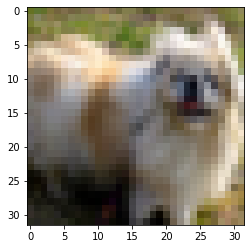

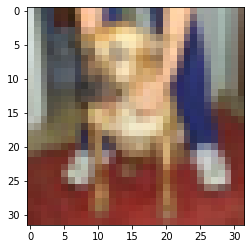

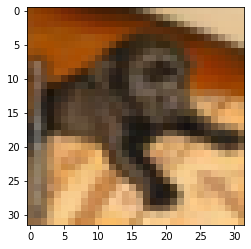

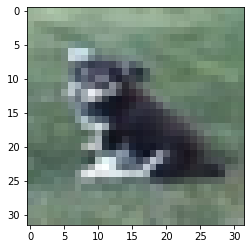

frog


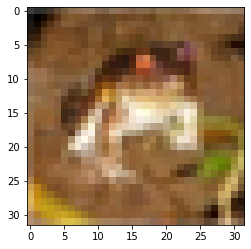

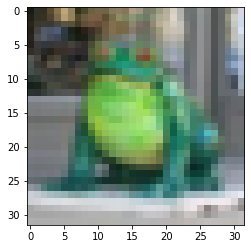

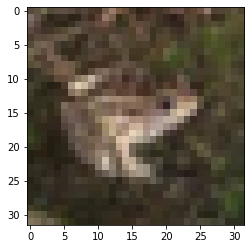

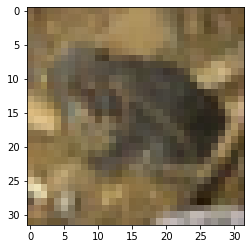

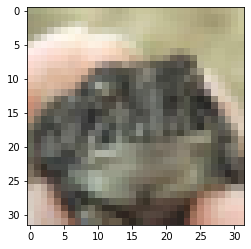

horse


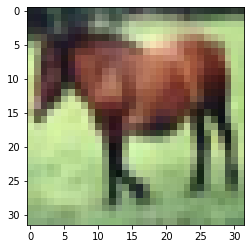

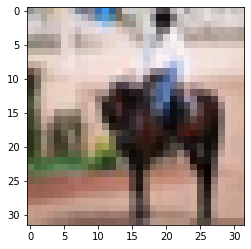

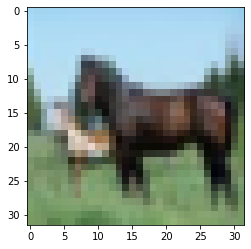

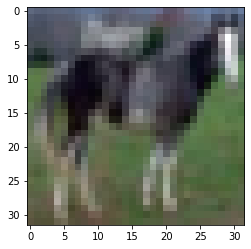

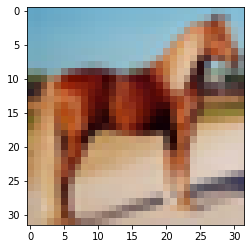

ship


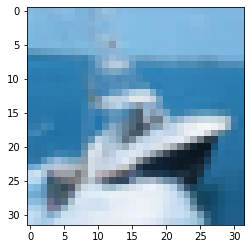

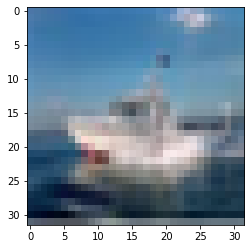

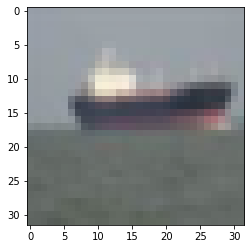

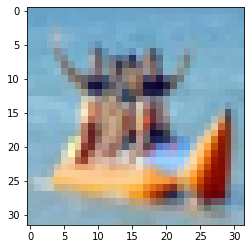

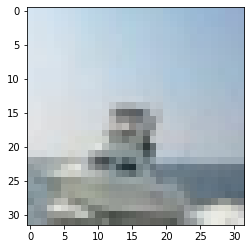

truck


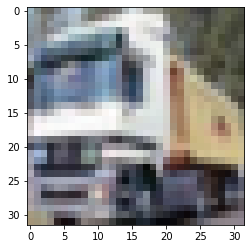

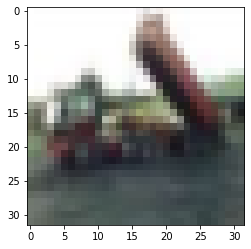

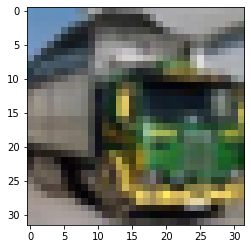

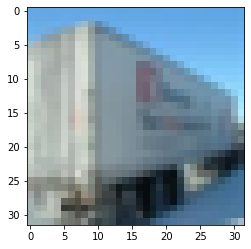

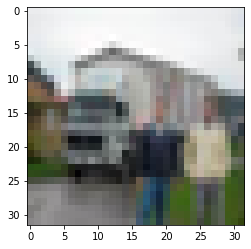

In [ ]:
x=0
while(x<10):
  i=0
  count=0
  while(count<5):
    if(train_y[i]==x):
      if(count==0): 
        print(labels2id[x])
      plt.imshow(np.transpose(train_x1[i], (1, 2,0)))
      plt.show()
      count+=1
    i+=1
  x+=1

In [ ]:
train_x = train_x.reshape(train_x.shape[0],3072)
test_x = test_x.reshape(test_x.shape[0],3072)

lda = LinearDiscriminantAnalysis()
train_x = lda.fit(train_x, train_y)
y_pred=lda.predict(test_x)

In [ ]:
# train_x = lda.fit_transform(train_x, train_y)
# test_x = lda.transform(test_x)
# classifier = RandomForestClassifier()
# classifier.fit(train_x, train_y)
# y_pred = classifier.predict(test_x)

In [ ]:
print('Accuracy : ' + str(accuracy_score(test_y, y_pred)))
conf_m = confusion_matrix(test_y, y_pred)

for i in range(0,10):
  sum=0
  for j in range(0,10):
     sum+=conf_m[i][j]
  print(str(labels2id[i]) + ' Accuracy : ' + str(conf_m[i][i]/sum))

Accuracy : 0.3713
airplane Accuracy : 0.463
automobile Accuracy : 0.415
bird Accuracy : 0.255
cat Accuracy : 0.245
deer Accuracy : 0.271
dog Accuracy : 0.329
frog Accuracy : 0.413
horse Accuracy : 0.404
ship Accuracy : 0.494
truck Accuracy : 0.424
